In [31]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re

In [32]:
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
url = "https://www.moneydj.com/funddj/yb/YP301000.djhtm"
r = requests.get(url, headers = url_headers)
r.encoding = "big5"
soup = BeautifulSoup(r.text, "lxml")

In [33]:
# 拞國內股票開放行
table = soup.find(class_="InternalSearch-TD")
trs = table.find_all("tr")
pattern = "ET\d{6}"
fundGroup = []
for idx in (range(1, len(trs))):
    tds = trs[idx].find_all("td")
    for td in tds:
        if(td.text.strip() != ''):
            fundGroup.append([td.text, re.findall(pattern, td.a["href"])[0]])
df = pd.DataFrame(fundGroup, columns = ['類型', '代號'])       
print(df)      

      類型        代號
0    指數型  ET000001
1    科技類  ET001001
2    中小型  ET001004
3  一般股票型  ET001005
4   中概股型  ET001006
5    價值型  ET001007
6  上櫃股票型  ET001008


In [34]:
a = "ET001005"    # 國內股票型基金-一般股票型
url1 = "https://www.moneydj.com/funddj/ya/yp401002.djhtm?a=" + a + "&b=901"
r1 = requests.get(url1, headers = url_headers)
r1.encoding = "big5"
soup1 = BeautifulSoup(r1.text, "lxml")
table1 = soup1.find(id="oMainTable")
print(table1)

<table border="0" cellpadding="0" cellspacing="0" class="t05" id="oMainTable">
<thead>
<tr id="oScrollMenu"><th class="t2c1S" style="vertical-align:baseline;">排名 </th>
<th class="t2S" style="vertical-align:baseline;">基金名稱 </th>
<th class="t2S" style="vertical-align:baseline;">基金公司 </th>
<th class="t2S" style="vertical-align:baseline;">三個月<br/>(%) </th>
<th class="t2S" style="vertical-align:baseline;">六個月<br/>(%) </th>
<th class="t2S" style="vertical-align:baseline;">一年<br/>(%) </th>
<th class="t2S" style="vertical-align:baseline;">三年<br/>(%) </th>
<th class="t2S" style="vertical-align:baseline;">五年<br/>(%) </th>
<th class="t2S" style="vertical-align:baseline;">十年<br/>(%) </th>
</tr>
</thead>
<tbody>
<tr>
<td class="t3n0c1" myclass="t3n0c1">1</td>
<td class="t3t1" myclass="t3t1"><a href="/funddj/ya/yp010000.djhtm?a=ACDD01">安聯台灣大壩基金</a></td>
<td class="t3t1" myclass="t3t1"><a href="/funddj/ya/yp020000.djhtm?a=BFZ002">安聯投信</a></td>
<td class="t3n1" myclass="t3n1">9.72</td>
<td class="t3r1

In [53]:
funds = []
columns = ['基金代號','基金名稱','公司代號','基金公司','三個月','六個月','一年','三年','五年','十年']
trs = table1.find("tbody").find_all("tr")
for tr in trs:
    tds = tr.find_all("td")
    tmp = []
    for idx in range(1, len(tds)):        
        if(tds[idx].string.strip()=='N/A'):
            tmp.append(np.nan)
        elif(idx == 1 or idx == 2):
            tmp.append(tds[idx].a["href"].split("=")[-1])
            tmp.append(tds[idx].text)
        else:
            tmp.append(float(tds[idx].text))
    funds.append(tmp)
df1 = pd.DataFrame(funds, columns = columns)
df1.head(10) 


,基金代號,基金名稱,公司代號,基金公司,三個月,六個月,一年,三年,五年,十年
0,ACDD01,安聯台灣大壩基金,BFZ002,安聯投信,9.72,-8.96,4.20,66.79,102.13,476.52
1,AC0005,匯豐成功基金,BFZCIA,匯豐中華投信,1.99,-2.88,3.13,31.85,26.22,199.34
2,ACDD19,安聯台灣智慧基金,BFZ002,安聯投信,12.20,-9.69,-0.10,59.96,98.91,424.46
3,ACFH03,復華高成長基金,BFZFHA,復華投信,6.41,-13.48,-0.22,56.38,74.77,303.18
4,ACML01,保德信高成長基金,BFZMLA,保德信投信,5.36,-9.92,-0.26,26.35,28.92,150.26
5,ACFH15,復華全方位基金,BFZFHA,復華投信,6.73,-19.54,-1.27,50.55,66.24,216.20
6,ACII21,兆豐國際豐台灣基金,BFZIIA,兆豐國際投信,3.89,-4.42,-1.73,22.76,15.54,223.05
7,ACPS01,統一全天候基金,BFZPSA,統一投信,7.66,-12.62,-1.94,44.41,80.64,389.91
8,ACPS09,統一經建基金,BFZPSA,統一投信,8.35,-13.11,-2.00,38.75,74.65,301.20
9,ACFT13,富蘭克林華美傳產基金,BFZ008,富蘭克林華美投信,6.38,-7.73,-2.03,18.15,50.78,NaN


In [56]:
cnt3 = int(len(df1)/3)
cnt4 = int(len(df1)/4)

(27, 20)


In [58]:
M3 = df1.sort_values(by=['三個月'],ascending=False).head(cnt3)
M6 = df1.sort_values(by=['六個月'],ascending=False).head(cnt3)
Y1 = df1.sort_values(by=['一年'],ascending=False).head(cnt4)
Y3 = df1.sort_values(by=['三年'],ascending=False).head(cnt4)
Y5 = df1.sort_values(by=['五年'],ascending=False).head(cnt4)

In [59]:
fund = set(Y1['基金名稱']).intersection(set(Y3['基金名稱'])).intersection(set(Y5['基金名稱'])).intersection(set(M3['基金名稱'])).intersection(set(M6['基金名稱']))
fund = list(fund)
fund

['安聯台灣智慧基金', '安聯台灣大壩基金', '凱基開創基金']

In [60]:
Y1[Y1.基金名稱.isin(fund)]

,基金代號,基金名稱,公司代號,基金公司,三個月,六個月,一年,三年,五年,十年
0,ACDD01,安聯台灣大壩基金,BFZ002,安聯投信,9.72,-8.96,4.20,66.79,102.13,476.52
2,ACDD19,安聯台灣智慧基金,BFZ002,安聯投信,12.20,-9.69,-0.10,59.96,98.91,424.46
16,ACKG01,凱基開創基金,BFZ004,凱基投信,9.84,-7.52,-5.39,41.18,44.63,160.92


In [61]:
import matplotlib.pyplot as plt
fcode = "ACDD01"
startDate = "2018-01-01"
endDate = "2019-03-10"
url2 = "https://www.moneydj.com/funddj/bcd/tBCDNavList.djbcd?a=" + fcode + "&B=" + startDate + "&C=" + endDate + "&D="
r2 = requests.get(url2, headers = url_headers)
r2.encoding = "big5"
print(r2)

<Response [200]>


In [80]:
fund = r2.text.split(' ')
f1 = fund[0].split(',')
f2 = fund[1].split(',')
fundDF = pd.DataFrame(f1)
fundDF[1] = pd.to_numeric(f2)
fundDF[0] = pd.to_datetime(fundDF[0], format="%Y%m%d")
fundDF.index = fundDF[0]
fundDF.columns = ['datetime','unit']
fundDF.head(10)

,datetime,unit
0,,
2018-01-02,2018-01-02,24.49
2018-01-03,2018-01-03,24.90
2018-01-04,2018-01-04,25.25
2018-01-05,2018-01-05,25.10
2018-01-08,2018-01-08,25.06
2018-01-09,2018-01-09,24.86
2018-01-10,2018-01-10,24.42
2018-01-11,2018-01-11,24.40
2018-01-12,2018-01-12,24.64


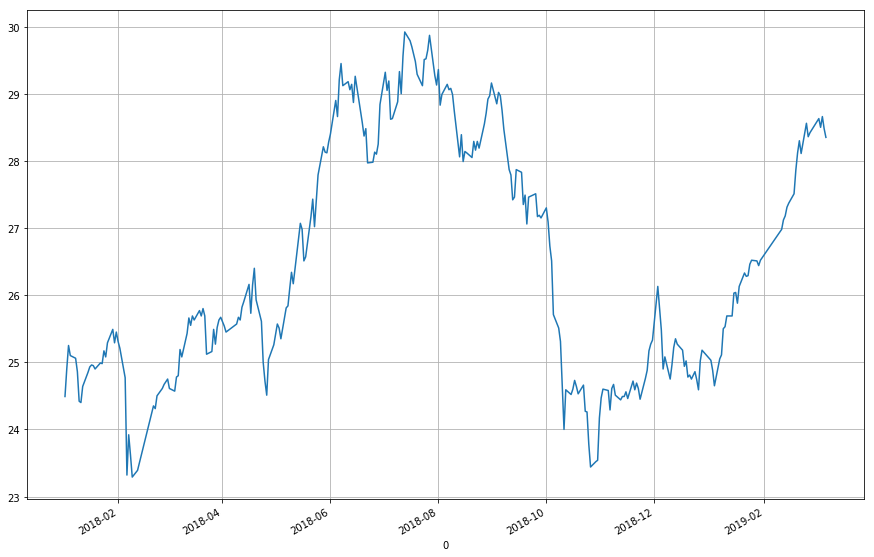

In [91]:
fundDF["unit"].plot(grid=True, figsize=(15,10))